In [39]:
!pip install seaborn==0.9.0

You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [79]:
import numpy as np
import pandas as pd
import metadict_save as ms
import warnings
import pickle 
import os
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 12})

import seaborn as sns
sns.set_context('paper')
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
results_dir = 'results/'

### Select results to load

In [101]:
# Select results to load

method = 'average_over_batch'
var = 1.0
mean = 0.0
decision_eps = 0.5
alpha = 0.6
beta = 0.4
hardcoded = True
key = "method: {}, var: {}, mean: {}, decision_eps: {}, alpha: {}, beta: {}, hardcoded: {}".format(method, var, mean, decision_eps, alpha, beta, hardcoded)
csv_path = key + '.csv'
x = os.listdir("results")
i = 1
df = pd.read_csv(os.path.join(results_dir, x[i]))
print(x[5])



# print(df)

method: PER, var: 10.0, mean: 0.0, decision_eps: 1.0, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv


In [102]:
#save_dir = 'results/06-19-11_15:48:20.385065eps=.5var=0/'
# meta_dict = pickle.load(open(results_path, 'rb'))
# mdf = ms.load(save_dir)
# #meta_dict = ms.load(save_dir)

#df = mdf[(mdf['method'] == method) & (mdf['var'] == var) 
         #& (mdf['mean'] == mean) & (mdf['decision_eps'] == decision_eps) 
         #& (mdf['alpha'] == alpha) & (mdf['beta'] == beta) & (mdf['hardcoded'] == hardcoded)]
        
        #df = meta_dict[key]
x = os.listdir("results")        
#         method/ average_over_batch, var/ 0.0, mean/ 0.0, decision_eps/ 1.0, alpha/ 0.6, beta/ 0.4, hardcoded/ True

In [103]:
["#388ed1", "#cc889f", "#f4b042", '#79b298']

['#388ed1', '#cc889f', '#f4b042', '#79b298']

## Visualize weight ratio

In [104]:
df['noisy_to_std_weight_ratio'] = df['noisy_weights'] / df['std_weights']

In [105]:
x

['method: average_over_batch, var: 0.0, mean: 0.0, decision_eps: 1.0, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv',
 'method: PER, var: 0.0, mean: 0.0, decision_eps: 1.0, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv',
 'method: average_over_batch, var: 10.0, mean: 0.0, decision_eps: 0.5, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv',
 'method: average_over_batch, var: 0.5, mean: 0.0, decision_eps: 1.0, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv',
 'method: PER, var: 0.5, mean: 0.0, decision_eps: 1.0, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv',
 'method: PER, var: 10.0, mean: 0.0, decision_eps: 1.0, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv',
 'method: average_over_batch, var: 0.0, mean: 0.0, decision_eps: 0.5, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv',
 'method: PER, var: 0.0, mean: 0.0, decision_eps: 0.5, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv',
 'method: PER, var

method: PER, var: 0.0, mean: 0.0, decision_eps: 1.0, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv


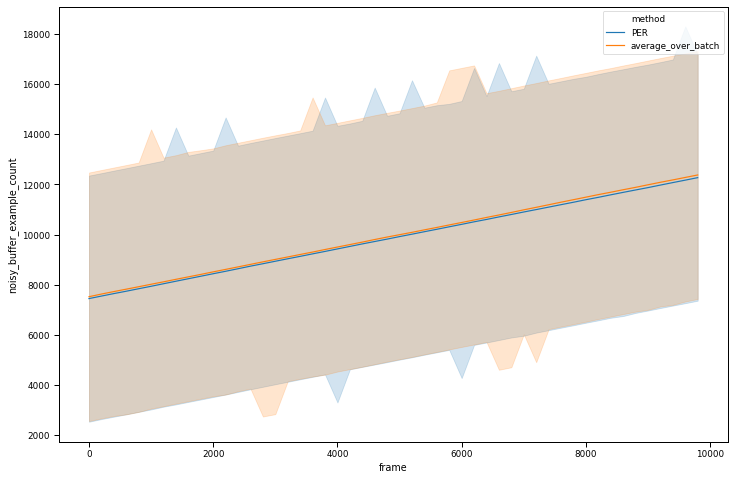

method: PER, var: 0.5, mean: 0.0, decision_eps: 1.0, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv


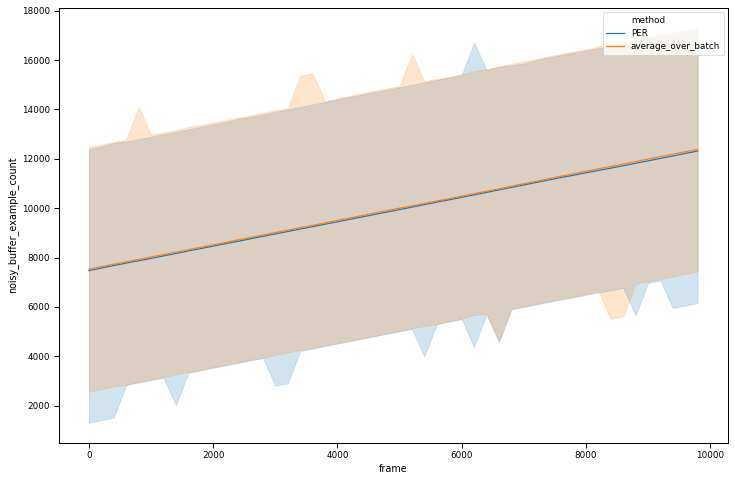

method: PER, var: 10.0, mean: 0.0, decision_eps: 1.0, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv


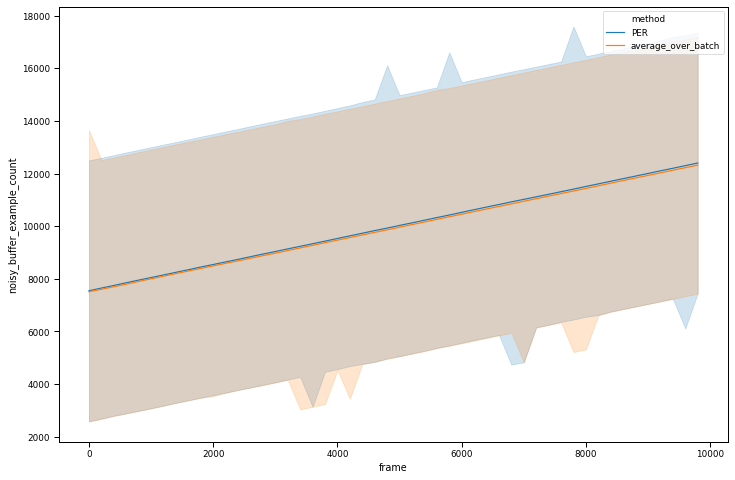

method: PER, var: 0.0, mean: 0.0, decision_eps: 0.5, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv


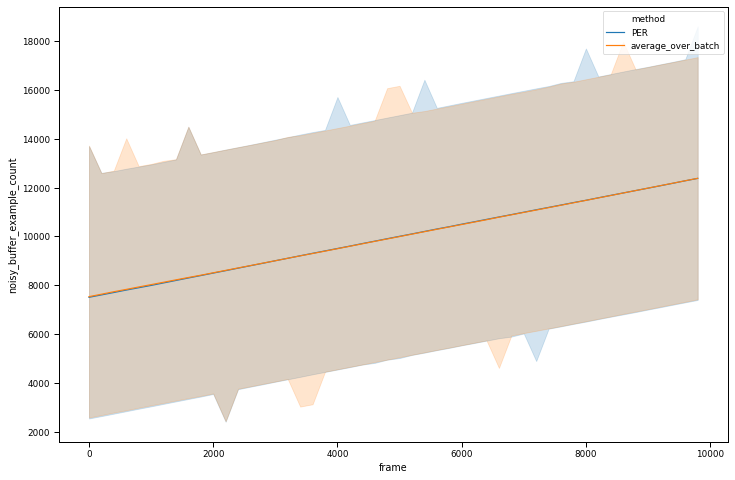

method: PER, var: 10.0, mean: 0.0, decision_eps: 0.5, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv


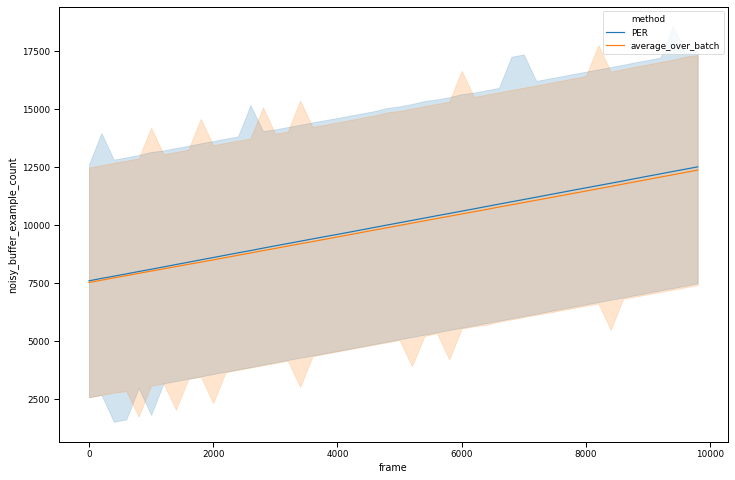

method: PER, var: 0.5, mean: 0.0, decision_eps: 0.5, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv


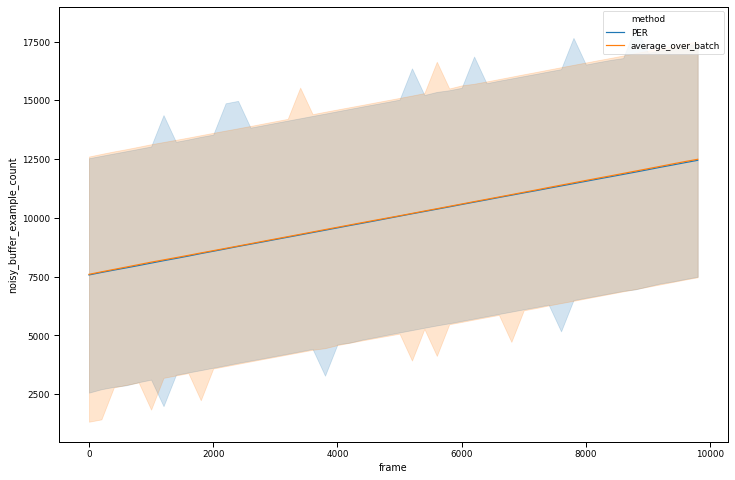

In [119]:
per_paths = [s for s in x if s[8] == "P"]
ave_paths = [s.replace("PER", "average_over_batch") for s in x]
# print(per_paths, ave_paths)
for i in range(len(per_paths)):
    print(per_paths[i])
    per_df = pd.read_csv(os.path.join(results_dir, per_paths[i]))
    ave_df = pd.read_csv(os.path.join(results_dir, ave_paths[i]))
    per_df['method'] = "PER"
    ave_df['method'] = "average_over_batch"
    df = per_df.append(ave_df)
    df['noisy_to_std_weight_ratio'] = df['noisy_weights'] / df['std_weights']
    plt.figure(figsize=(12,8))
    #noisy_to_std_weight_ratio
    sns.lineplot(x='frame', y='noisy_buffer_example_count', data=df, hue='method', estimator='mean')#, palette=palette)
    plt.show()


    

method: average_over_batch, var: 0.0, mean: 0.0, decision_eps: 1.0, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv
method: PER, var: 0.0, mean: 0.0, decision_eps: 1.0, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv
method: average_over_batch, var: 10.0, mean: 0.0, decision_eps: 0.5, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv
method: average_over_batch, var: 0.5, mean: 0.0, decision_eps: 1.0, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv
method: PER, var: 0.5, mean: 0.0, decision_eps: 1.0, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv
method: PER, var: 10.0, mean: 0.0, decision_eps: 1.0, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv
method: average_over_batch, var: 0.0, mean: 0.0, decision_eps: 0.5, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv
method: PER, var: 0.0, mean: 0.0, decision_eps: 0.5, alpha: 0.6, beta: 0.4, hardcoded: True, num_trials: 4.csv
method: PER, var: 10.0, mean: 0.0, decision_eps: 0

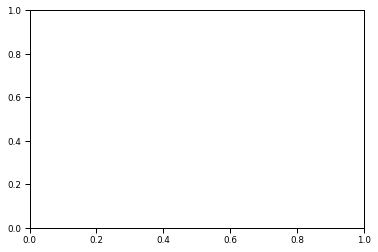

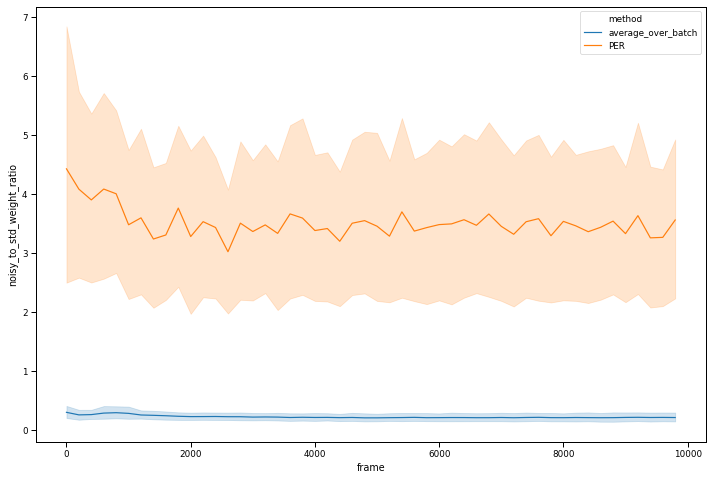

In [108]:
# sns.relplot(x='frame', y='noisy_to_std_weight_ratio', kind='line', data=df)

#df = pd.concat(x, axis=0)

fig, ax = plt.subplots()

giant_df = pd.DataFrame()

for i in range(len(x)):
    print(x[i])
    if x[i][8] == 'P':
        method = 'PER'
    else:
        method = 'average_over_batch'
        
    df = pd.read_csv(os.path.join(results_dir, x[i]))
    
    df['noisy_to_std_weight_ratio'] = df['noisy_weights'] / df['std_weights']
    
    df['method'] = method
    
    giant_df = giant_df.append(df)
    
plt.figure(figsize=(12,8))
sns.lineplot(x='frame', y='noisy_to_std_weight_ratio', data=giant_df, hue='method', estimator='mean')#, palette=palette)
plt.show()




## Visualize buffer contents

In [114]:
df_subset = df[['frame', 'std_buffer_example_count', 'noisy_buffer_example_count']]
df_subset = df_subset.melt('frame', var_name='env_type', value_name='example_count')

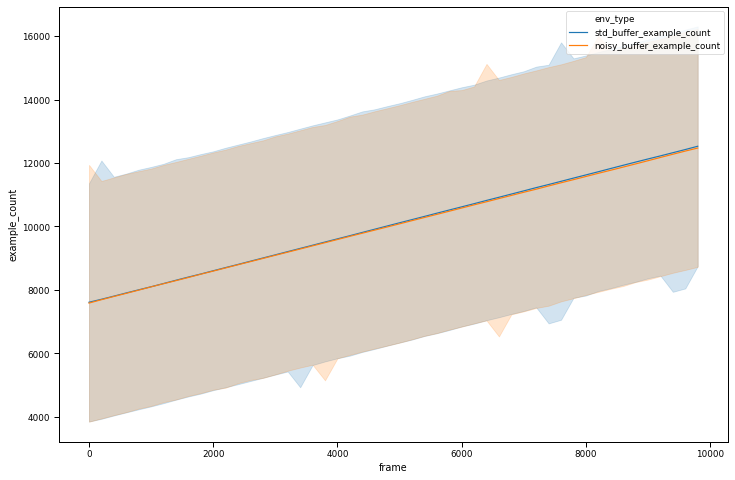

In [115]:
# sns.relplot(x='frame', y='example_count', hue='env_type', data=df_subset, kind='line')
plt.figure(figsize=(12,8))
sns.lineplot(x='frame', y='example_count', data=df_subset, hue='env_type', estimator='mean')#, palette=palette)




## Plot validation reward

In [50]:
# sns.relplot(x='frame', y='val_reward', kind='line', data=df)
plt.figure(figsize=(12,8))
sns.lineplot(x='frame', y='val_reward', data=df, hue='method', estimator='mean')

ValueError: Could not interpret input 'method'

<Figure size 864x576 with 0 Axes>

## Plot proportion of noisy to standard examples selected

In [ ]:
# sns.relplot(x='frame', y='proportion', kind='line', data=df)
plt.figure(figsize=(12,8))
sns.lineplot(x='frame', y='proportion', data=df, hue='method', estimator='mean')